<a href="https://colab.research.google.com/github/leoaliaga/beamana_pandas/blob/main/NuMIFluxTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to make plots of the NuMI neutrino flux at the neutrino detectors

# Sofware

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from google.colab import drive

# Loading the input data


In [ ]:
files = glob.glob('/content/flux_info_g4numiv6_me000z200i_nominal_*_0001.csv')
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)
df.head()

,NuType,EnerNu_NOvAND,Wgt_NOvAND,EnerNu_NOvAFD,Wgt_NOvAFD,EnerNu_MINERvA,Wgt_MINERvA,ParType,ParProdPt,ParProdPz,ParDecPt,ParDecPz
0,-14,0.050799,1.795400e-05,0.050498,1.780560e-11,0.049710,1.564220e-05,-211,0.234063,0.430023,0.228354,0.386450
1,-14,0.180771,1.643600e-05,0.178643,2.096660e-11,0.200175,1.854640e-05,-211,0.238091,1.413480,0.161843,1.086690
2,14,1.183350,5.009130e-04,1.393510,9.939320e-10,0.737918,1.798970e-04,211,0.652216,8.113920,0.262563,8.128760
3,14,0.021035,6.111470e-07,0.020957,8.991350e-13,0.021339,5.817190e-07,211,0.137417,0.408879,0.297406,0.179595
4,-14,0.037344,9.503950e-07,0.037481,1.438030e-12,0.036916,8.593760e-07,-211,0.142180,0.140685,0.147861,0.127250


In [ ]:
files2ka = glob.glob('/content/flux_info_g4numiv6_me000z200i_Plus2kAHorns_*_0008.csv')
df_2ka = pd.DataFrame()
for f in files2ka:
    csv = pd.read_csv(f)
    df_2ka = df_2ka.append(csv)
df_2ka.head()

,NuType,EnerNu_NOvAND,Wgt_NOvAND,EnerNu_MINERvA,Wgt_MINERvA
0,-14,0.173934,0.000041,0.153663,0.000030
1,-14,0.019944,0.000002,0.020119,0.000002
2,-14,0.793389,0.000005,0.805612,0.000005
3,14,0.116092,0.000007,0.111137,0.000006
4,-14,0.056554,0.000001,0.054004,0.000001


In [ ]:
files3mmx = glob.glob('/content/flux_info_g4numiv6_me000z200i_Plus3mmHorn1X_*_0010.csv')
df_3mmx = pd.DataFrame()
for f in files3mmx:
    csv = pd.read_csv(f)
    df_3mmx = df_3mmx.append(csv)

In [ ]:
files3mmy = glob.glob('/content/flux_info_g4numiv6_me000z200i_Plus3mmHorn1Y_*_0012.csv')
df_3mmy = pd.DataFrame()
for f in files3mmy:
    csv = pd.read_csv(f)
    df_3mmy = df_3mmy.append(csv)

In [ ]:
files7mmtgt = glob.glob('/content/flux_info_g4numiv6_me000z200i_Plus7mmTargetZ_*_0028.csv')
df_7mmtgt = pd.DataFrame()
for f in files7mmtgt:
    csv = pd.read_csv(f)
    df_7mmtgt = df_7mmtgt.append(csv)

# Variables in each file
*   **NuType**: PDG code of the neutrino type. 14: muon neutrino, -14: muon antineutrino, etc.
*   **EnerNu_X**: neutrino energy (GeV) of the detector X (NOvA ND, NOvA FD, MINERvA)
*   **Wgt_X**: weight to applied to consider the probability of the neutrino pass through the detector X (NOvA ND, NOvA FD, MINERvA)
*   **ParType**: PDG code of the neutrino parent type. 211: pion plus, -211: pion minus, etc
*   **ParProdPt and ParProdPz**: transversal and longitudinal momentum of the neutrino parents when they are produced 
*  **ParDecPt and ParDecPz**: transversal and longitudinal momentum of the neutrino parents when they decay

Note: each data file has the result 500 000 sumulated protons colliding on the NuMI target (POT)





# Data analysis 
*Subsets of the dataFrame with only one neutrino type 


In [ ]:
numu        = df.loc[       df['NuType']        == 14]
numu_2ka    = df_2ka.loc[   df_2ka['NuType']    == 14]
numu_3mmx   = df_3mmx.loc[  df_3mmx['NuType']   == 14]
numu_3mmy   = df_3mmy.loc[  df_3mmy['NuType']   == 14]
numu_7mmtgt = df_7mmtgt.loc[df_7mmtgt['NuType'] == 14]
nue        = df.loc[        df['NuType']        == 12]
nue_2ka    = df_2ka.loc[    df_2ka['NuType']    == 12]
nue_3mmx   = df_3mmx.loc[   df_3mmx['NuType']   == 12]
nue_3mmy   = df_3mmy.loc[   df_3mmy['NuType']   == 12]
nue_7mmtgt = df_7mmtgt.loc[ df_7mmtgt['NuType'] == 12]

*   Plotting the muon neutrino energy distribution for NOvA ND and MINERvA 


*   Plotting the neutrino energy distributions for each neutrino type at NOvA ND

Text(0.5, 1.0, 'NuMI muon neutrino at NOvA ND')

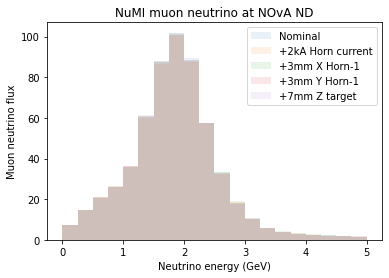

In [ ]:
alphaval=0.1
mine=0
maxe=5
nbins=20
(val_numu       , bins_numu       , patches_numu       ) = plt.hist(numu['EnerNu_NOvAND']      , range=(mine, maxe) , bins=nbins, weights=numu['Wgt_NOvAND']       , alpha=alphaval, label='Nominal')
(val_numu_2ka   , bins_numu_2ka   , patches_numu_2ka   ) = plt.hist(numu_2ka['EnerNu_NOvAND']  , range=(mine, maxe) , bins=nbins, weights=numu_2ka['Wgt_NOvAND']   , alpha=alphaval, label='+2kA Horn current')
(val_numu_3mmx  , bins_numu_3mmx  , patches_numu_3mmx  ) = plt.hist(numu_3mmx['EnerNu_NOvAND'] , range=(mine, maxe) , bins=nbins, weights=numu_3mmx['Wgt_NOvAND']  , alpha=alphaval, label='+3mm X Horn-1')
(val_numu_3mmy  , bins_numu_3mmy  , patches_numu_3mmy  ) = plt.hist(numu_3mmy['EnerNu_NOvAND'] , range=(mine, maxe) , bins=nbins, weights=numu_3mmy['Wgt_NOvAND']  , alpha=alphaval, label='+3mm Y Horn-1')
(val_numu_7mmtgt, bins_numu_7mmtgt, patches_numu_7mmtgt) = plt.hist(numu_7mmtgt['EnerNu_NOvAND'],range=(mine, maxe) , bins=nbins, weights=numu_7mmtgt['Wgt_NOvAND'], alpha=alphaval, label='+7mm Z target')
plt.legend()
plt.ylabel('Muon neutrino flux')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI muon neutrino at NOvA ND')

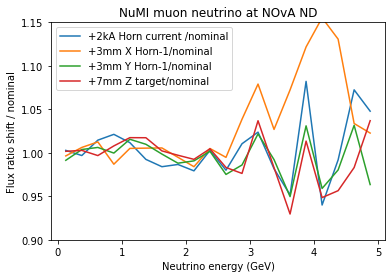

In [ ]:
rat_numu_2ka    = np.divide(val_numu_2ka   , val_numu)
rat_numu_3mmx   = np.divide(val_numu_3mmx  , val_numu)
rat_numu_3mmy   = np.divide(val_numu_3mmy  , val_numu)
rat_numu_7mmtgt = np.divide(val_numu_7mmtgt, val_numu)
bin_centers = 0.5*(bins_numu[:-1] + bins_numu[1:])
plt.ylim((0.9,1.15))

plt.ylabel('Flux ratio shift / nominal')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI muon neutrino at NOvA ND')

plt.plot(bin_centers,rat_numu_2ka   , label='+2kA Horn current /nominal') ## using bin_centers rather than edges
plt.plot(bin_centers,rat_numu_3mmx  , label='+3mm X Horn-1/nominal')
plt.plot(bin_centers,rat_numu_3mmy  , label='+3mm Y Horn-1/nominal') 
plt.plot(bin_centers,rat_numu_7mmtgt, label='+7mm Z target/nominal')
plt.legend()
plt.show()

Text(0.5, 1.0, 'NuMI electron neutrino at NOvA ND')

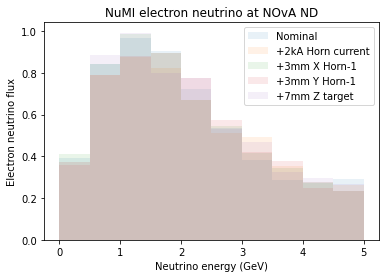

In [ ]:
alphaval=0.1
mine=0
maxe=5
nbins=10
(val_nue       , bins_nue       , patches_nue       ) = plt.hist(nue['EnerNu_NOvAND']      , range=(mine, maxe) , bins=nbins, weights=nue['Wgt_NOvAND']       , alpha=alphaval,label='Nominal')
(val_nue_2ka   , bins_nue_2ka   , patches_nue_2ka   ) = plt.hist(nue_2ka['EnerNu_NOvAND']  , range=(mine, maxe) , bins=nbins, weights=nue_2ka['Wgt_NOvAND']   , alpha=alphaval,label='+2kA Horn current')
(val_nue_3mmx  , bins_nue_3mmx  , patches_nue_3mmx  ) = plt.hist(nue_3mmx['EnerNu_NOvAND'] , range=(mine, maxe) , bins=nbins, weights=nue_3mmx['Wgt_NOvAND']  , alpha=alphaval,label='+3mm X Horn-1')
(val_nue_3mmy  , bins_nue_3mmy  , patches_nue_3mmy  ) = plt.hist(nue_3mmy['EnerNu_NOvAND'] , range=(mine, maxe) , bins=nbins, weights=nue_3mmy['Wgt_NOvAND']  , alpha=alphaval,label='+3mm Y Horn-1')
(val_nue_7mmtgt, bins_nue_7mmtgt, patches_nue_7mmtgt) = plt.hist(nue_7mmtgt['EnerNu_NOvAND'],range=(mine, maxe) , bins=nbins, weights=nue_7mmtgt['Wgt_NOvAND'], alpha=alphaval,label='+7mm Z target')
plt.legend()
plt.ylabel('Electron neutrino flux')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI electron neutrino at NOvA ND')

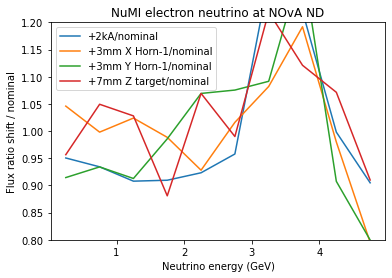

In [ ]:
rat_nue_2ka=np.divide(val_nue_2ka,val_nue)
rat_nue_3mmx=np.divide(val_nue_3mmx,val_nue)
rat_nue_3mmy=np.divide(val_nue_3mmy,val_nue)
rat_nue_7mmtgt=np.divide(val_nue_7mmtgt,val_nue)
bin_centers = 0.5*(bins_nue[:-1] + bins_nue[1:])
plt.ylim((0.8,1.2))

plt.ylabel('Flux ratio shift / nominal')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI electron neutrino at NOvA ND')

plt.plot(bin_centers,rat_nue_2ka,label='+2kA/nominal') ## using bin_centers rather than edges
plt.plot(bin_centers,rat_nue_3mmx,label='+3mm X Horn-1/nominal')
plt.plot(bin_centers,rat_nue_3mmy,label='+3mm Y Horn-1/nominal') 
plt.plot(bin_centers,rat_nue_7mmtgt,label='+7mm Z target/nominal')
plt.legend()
plt.show()